<a href="https://colab.research.google.com/github/MuditDubey01/Employee_Attrition_Problem/blob/main/Employee_Attrition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

Problem Statement: To Predict the salary of the employee based on the information provided in the dataset.

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm
# tqdm-> The ability to estimate the time remaining until the task is complete.

In [ ]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('/Users/shashidharreddy/Downloads/train_dataset.csv')
train_data_salaries = pd.read_csv('/Users/shashidharreddy/Downloads/train_salaries.csv')
test_data = pd.read_csv('/Users/shashidharreddy/Downloads/test_dataset.csv')

In [ ]:
# check the train data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
# check the train data salary
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
# check the test data
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [ ]:
# Adding salary data to train_dataset using merge on jobId
train_data=pd.merge(train_data,train_data_salaries,on='jobId')
train_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary']>30]
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [ ]:
# get all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [ ]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


-> After checking the Dtypes of all the columns 

    1. object - String values
    2. int64 - Numerical values

-> There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For train_dataset
# For more information on the dataset like the total count in all the columns:min, max values and more information of the respective columns  
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


## Get the total number of samples in the dataset using the len() function

In [ ]:
# len of train and test dataset
print("train data length:",len(train_data))
print("test data length:",len(test_data))

train data length: 997548
test data length: 1000000


## Get unique values

In [ ]:
# get how many unique values are in train_dataset
for x in train_data.columns:
 print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [ ]:
# get how many unique values are in test_dataset
for x in test_data.columns:
 print(x,':',len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [ ]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [ ]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'],axis=1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values-

1. jobType
2. degree
3. major
4. industry

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
    if train_data[x].dtype=='object':
        categorical_list.append(x)
    elif train_data[x].dtype=='int64':
         var_list.append(x)
    elif train_data[x].dtype=='float':
         var_list.append(x)

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [ ]:
# Correlation matrix using pandas
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

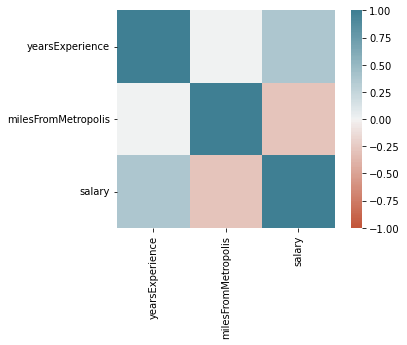

In [ ]:
# Correlation metrix using seaborn
ax= sns.heatmap(corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True)

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

10. Determine whether the association between the variables is statistically significant.

11. Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table-It  is used to count the number of observations in each combination of the two variables
    contingency_table =pd.crosstab(train_data[var_1],train_data[var_2]) 
    
    #Observed Values-these are the counts in the contingency table
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic, The test checks if the chi-square statistic is greater than the critical value, and if so
    # rejects the null hypothesis (there is no relationship between the variables).
    # Similarly, it checks if the p-value is less than the significance level and rejects the null hypothesis if so.
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. Scatter plot's are used to observe and show relationships between two numeric variables.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3.  A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.


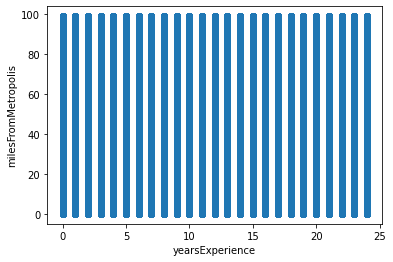

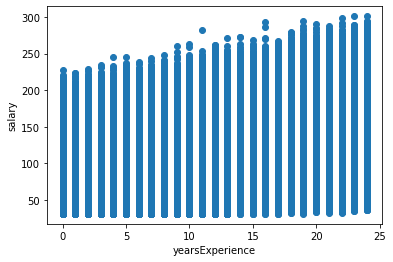

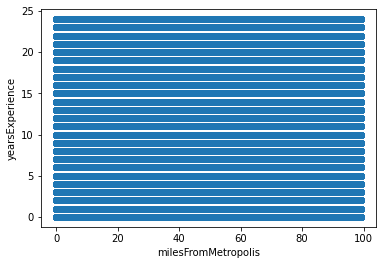

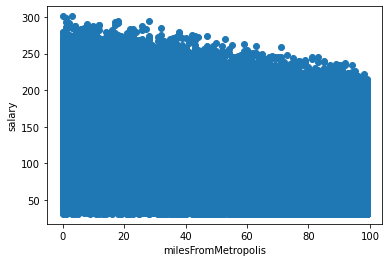

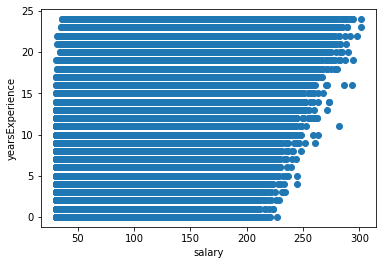

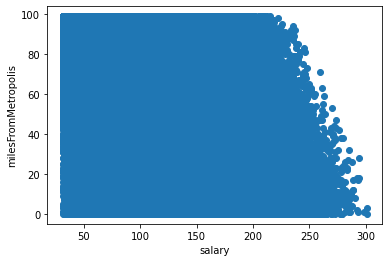

In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()
    
# Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

4. It help in identifying potential issues with the data, such as outliers, missing values, or data that is not normally distributed. For example, if the histogram shows that the data is skewed, it may require a transformation (such as taking a logarithm or a square root) to make the data more normally distributed.

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

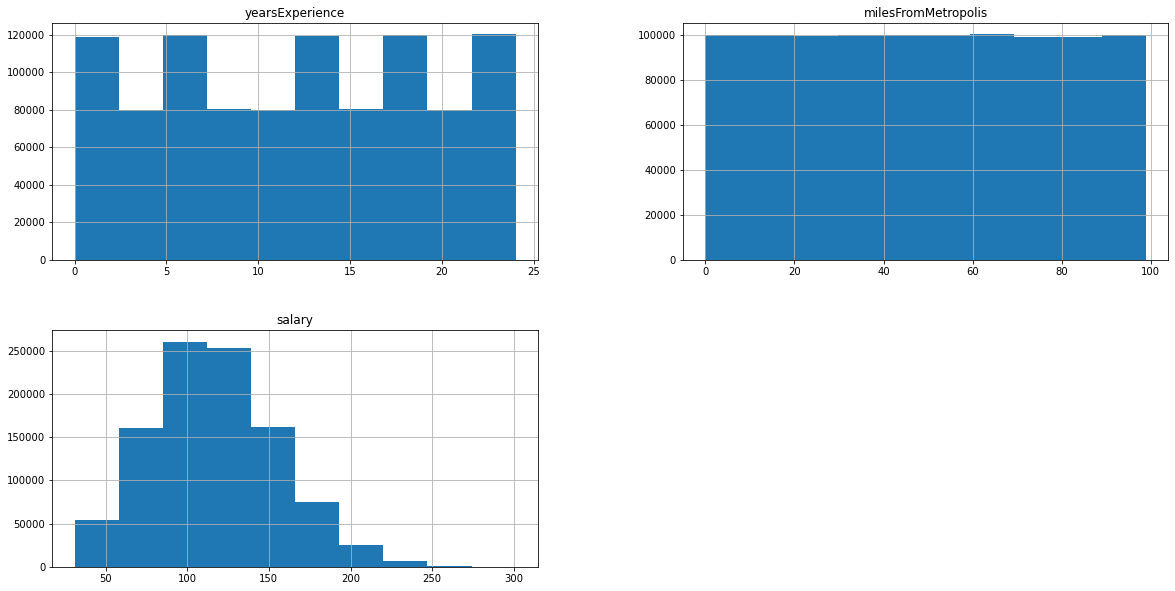

In [ ]:
# Histogram using pandas 
train_data.hist(figsize=(20,10))

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

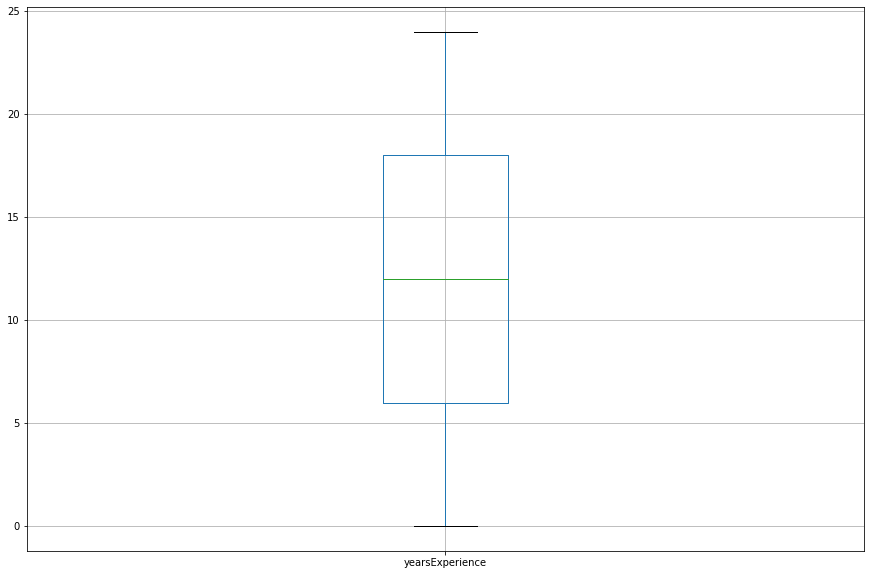

In [ ]:
# box plot using pandas 
# box plot for yearsExperience column
train_data.boxplot(column=['yearsExperience'],figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

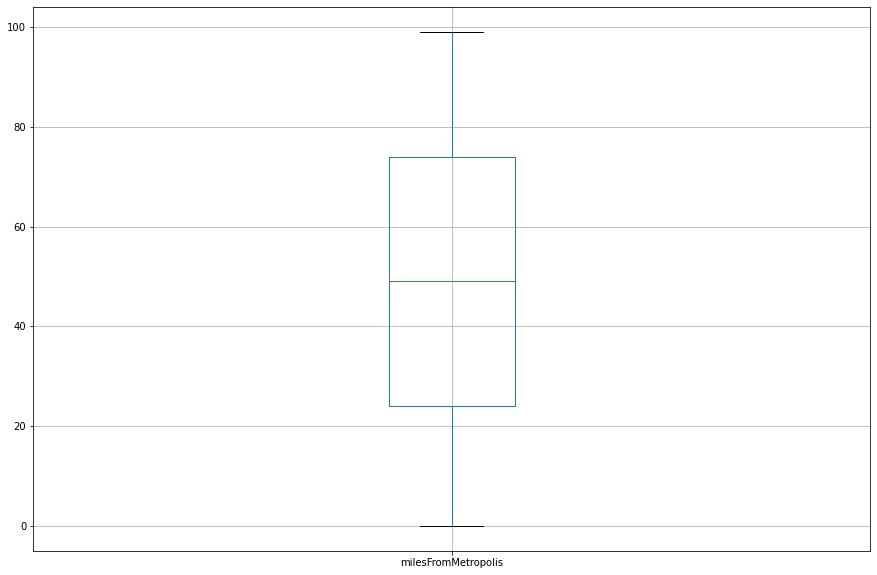

In [ ]:
# box plot using pandas 
# box plot for milesFromMetropolis column
train_data.boxplot(column=['milesFromMetropolis'],figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

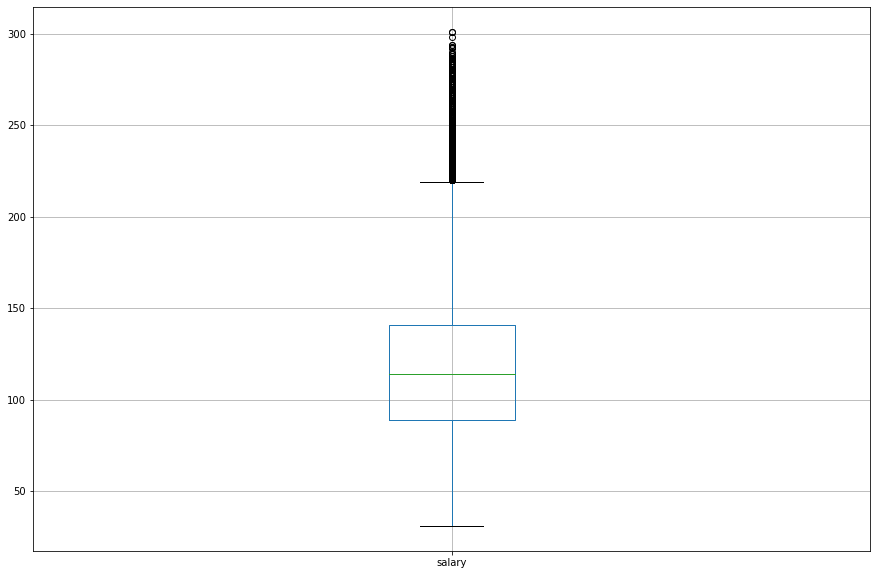

In [ ]:
# box plot using pandas 
# box plot for salary column
train_data.boxplot(column=['salary'],figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

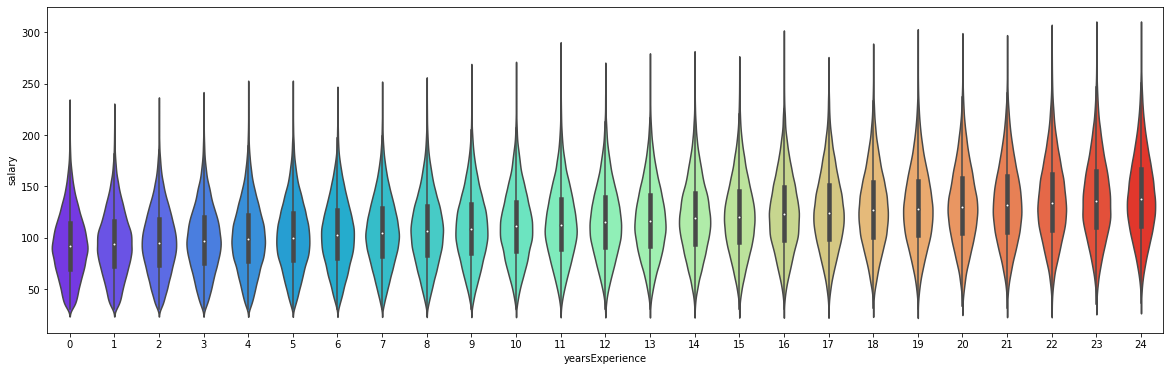

In [ ]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(data=train_data,x='yearsExperience',y='salary',palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

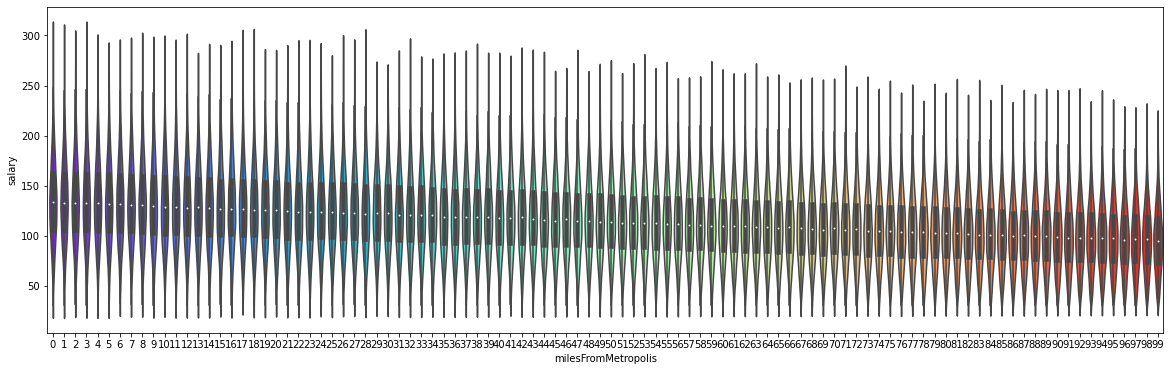

In [ ]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

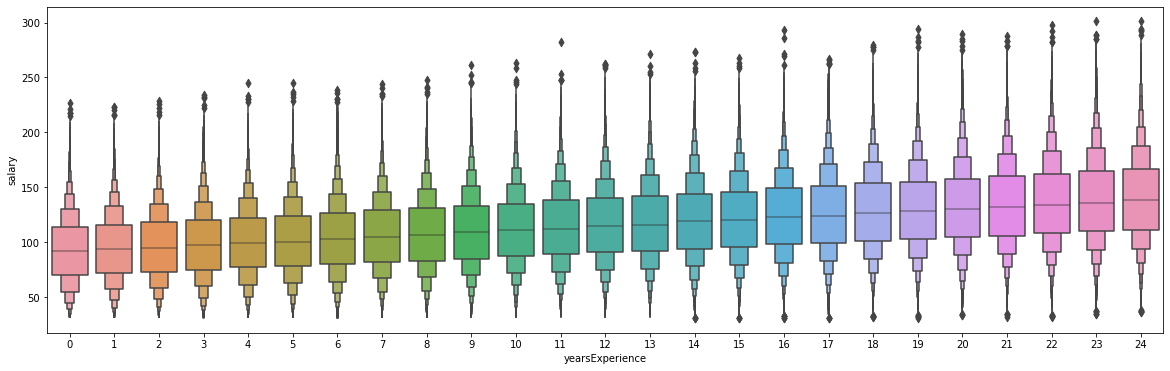

In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(data=train_data,x='yearsExperience',y='salary')

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

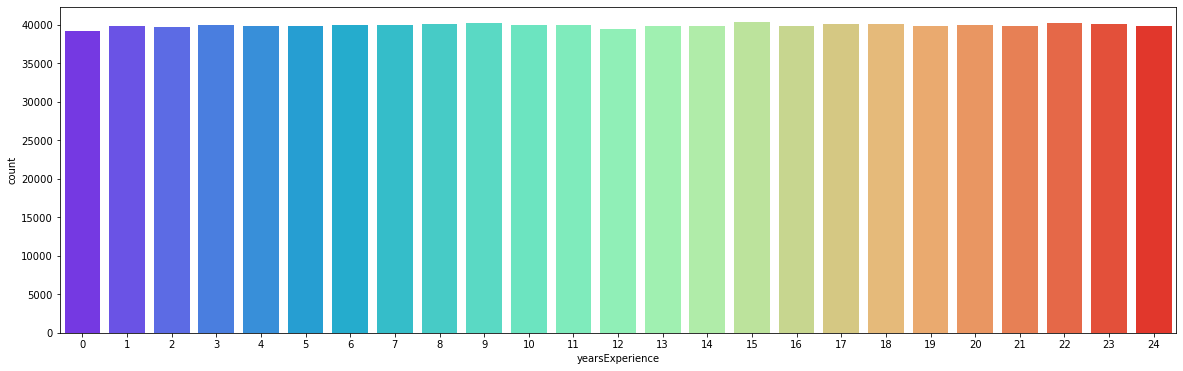

In [ ]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))

sns.countplot(data=train_data,x='yearsExperience',palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

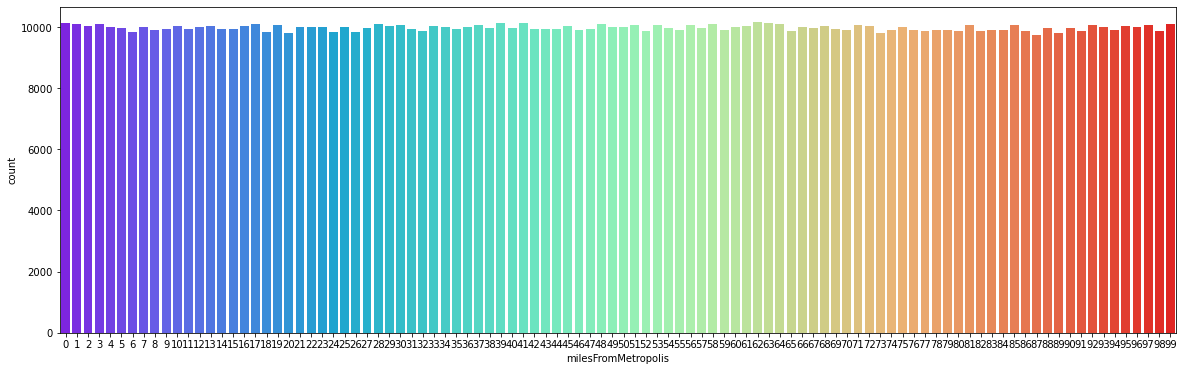

In [ ]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(data=train_data,x='milesFromMetropolis',palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

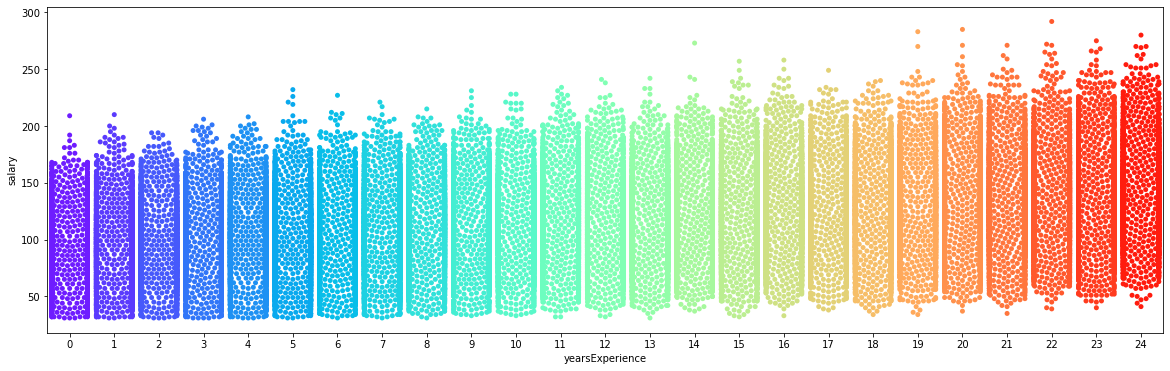

In [ ]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(data=train_data.iloc[1:50000],x='yearsExperience',y='salary',palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

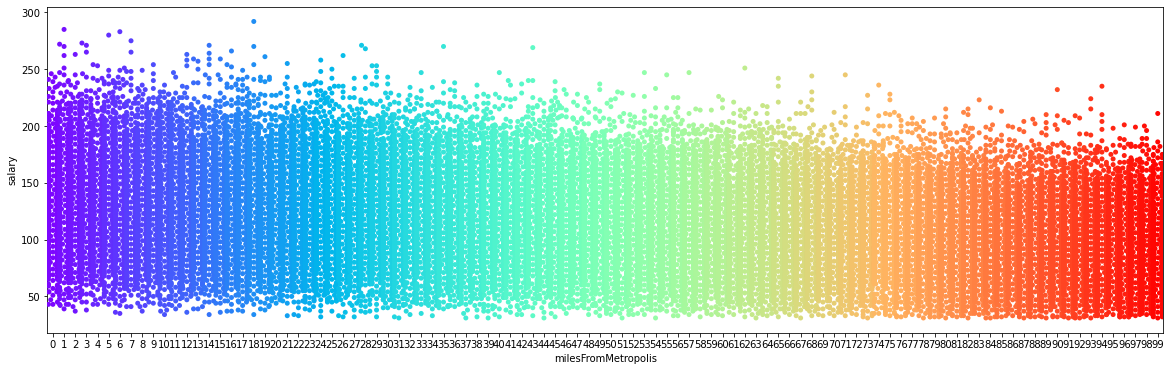

In [ ]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(data=train_data.iloc[1:50000],x='milesFromMetropolis',y='salary',palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

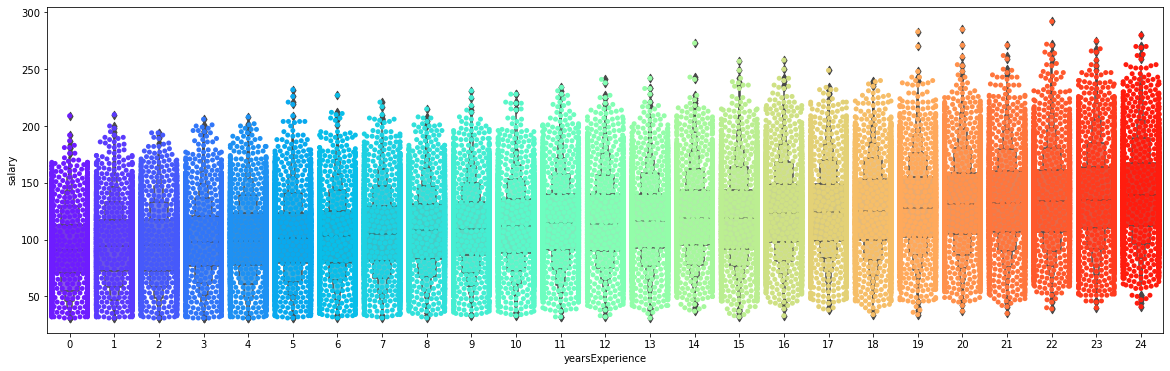

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(data=train_data.iloc[1:50000],x='yearsExperience',y='salary',palette='rainbow')
sns.boxenplot(data=train_data.iloc[1:50000],x='yearsExperience',y='salary',palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

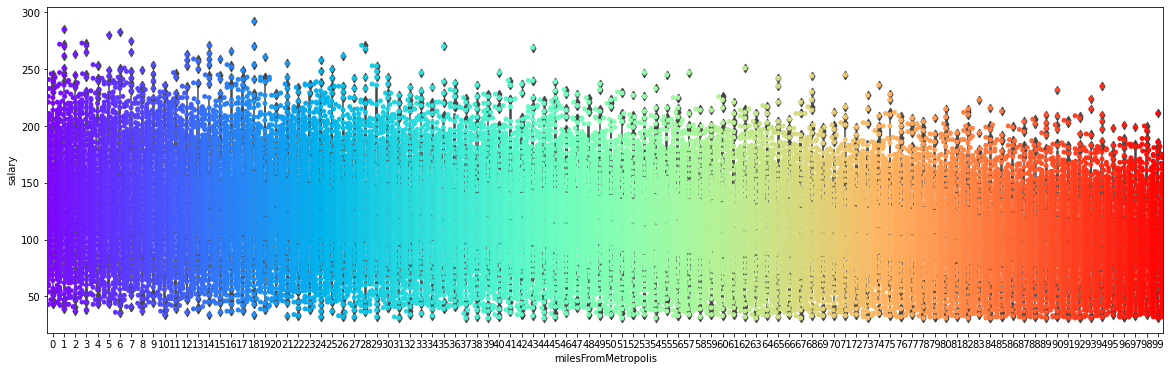

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(data=train_data.iloc[1:50000],x='milesFromMetropolis',y='salary',palette='rainbow')
sns.boxenplot(data=train_data.iloc[1:50000],x='milesFromMetropolis',y='salary',palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

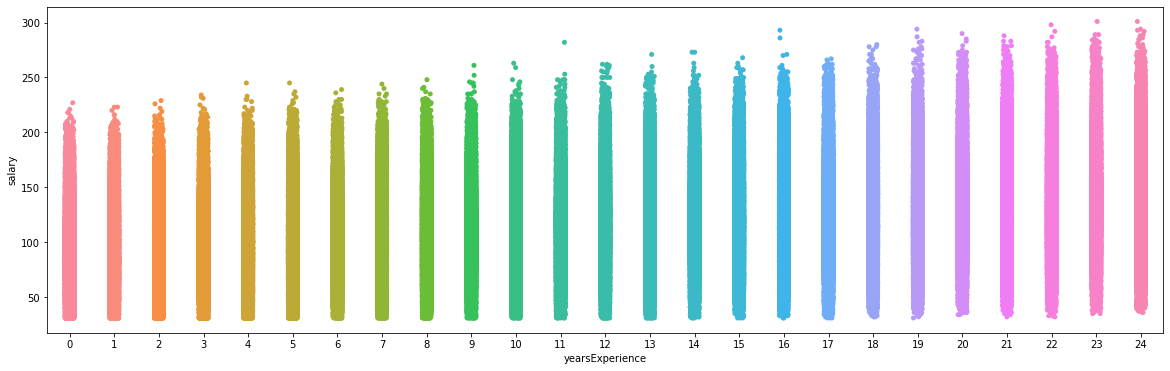

In [ ]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(data=train_data,x='yearsExperience',y='salary')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

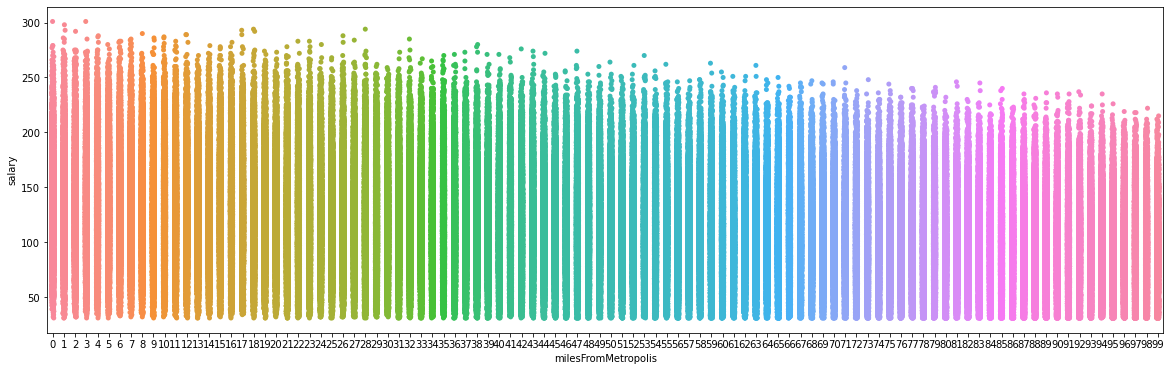

In [ ]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(data=train_data,x='milesFromMetropolis',y='salary')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)

# target values
target =train_data['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns!=names[i]]

  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()

  # geting the r^2 value of results.
  rsq = results.rsquared
  
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## Dendrogram

In supervised regression problems, dendrograms can help to identify groups of input features that are highly correlated with each other and with the target variable. This information can be useful for feature selection and feature engineering, as it can help to identify redundant or irrelevant features that can be removed to improve the performance of the model.

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

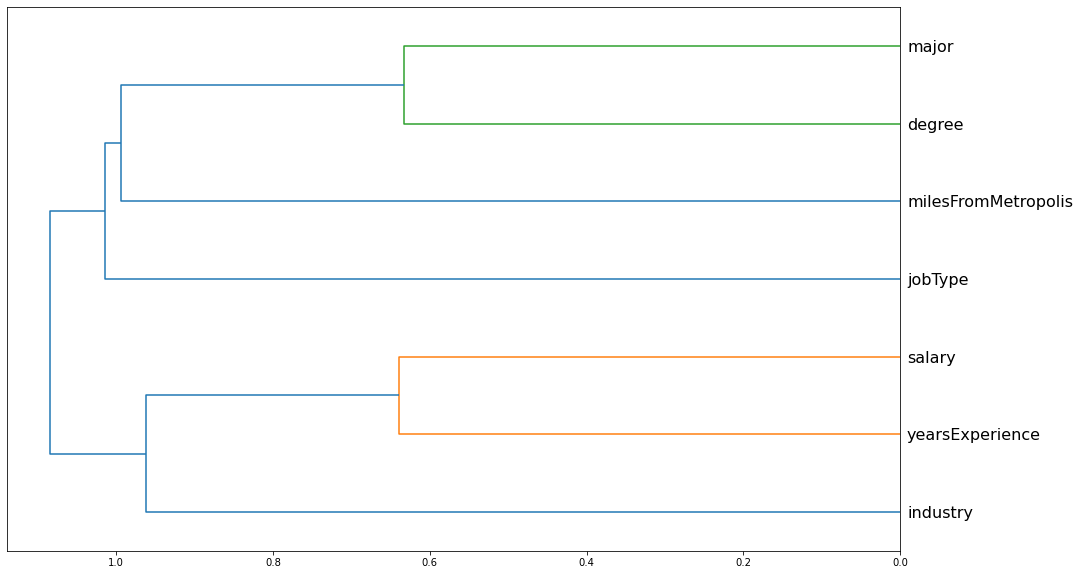

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram =scipy.cluster.hierarchy.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16) 

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categorical values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* eg: The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  #First, the function creates an instance of the MinMaxScaler class and assigns it to the variable scaler
  scaler=MinMaxScaler()

  df[col] =scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self,X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(x.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Split the labels and the target
train_x = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_y = train_data['salary']

In [ ]:
# Features
train_X.head()

NameError: name 'train_X' is not defined

In [ ]:
# Target
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
# passing features dataframe for one hot encoding process
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()


NameError: name 'OneHotEncoder' is not defined

In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(train_X,train_Y,test_size=0.2)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(x_train), V_train), rmse(m.predict(x_test), Y_test),
           m.score(x_train, V_train),m.score(x_test, Y_test),
           median_absolute_error(.predict(x_train), V_train),median_absolute_error(m.predict(x_test), Y_test),
           metrics.mean absolute_error(m.predict(x_train), Y_train),metrics.mean absolute_error(m.predict(x_test), Y_test)
           ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


SyntaxError: invalid syntax (2399606989.py, line 15)

In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.Dataframe()

    _df = pd.Dataframe()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
            .sum().['feature_importance']\
            .sort_values('feature_importance', ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sans.boxenplot(data=feature_importance_df,
                   x='feature_importance',
                   y='column',
                   order=order,
                   ax=ax,
                   alette='viridis',
                   orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    
    return fig, ax


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.6220111989763
RMSE-Test: 19.647019242368653
Score-Train: 0.7403608632875435
Score-Test: 0.7399855346213173
MedAE-Train: 13.7578125
MedAE-Test: 13.78515625
MeanAE-Train: 15.864013906214366
MeanAE-Test: 15.893147195002756 

CPU times: user 1.84 s, sys: 374 ms, total: 2.21 s
Wall time: 1.36 s


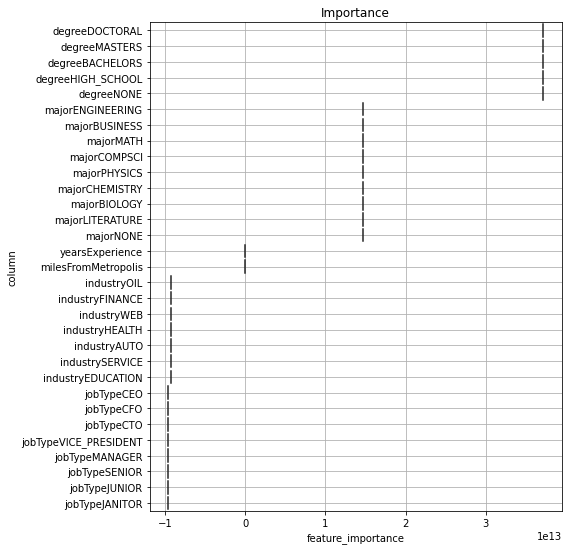

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train, Y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, train_X) 


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. 

RMSE-Train: 20.803214873259986
RMSE-Test: 20.846985219920825
Score-Train: 0.708533754514932
Score-Test: 0.7057448045732921
MedAE-Train: 13.969999999999999
MedAE-Test: 14.080000000000005
MeanAE-Train: 16.55974068797078
MeanAE-Test: 16.632732364948886 

CPU times: user 1min 18s, sys: 641 ms, total: 1min 19s
Wall time: 1min 19s


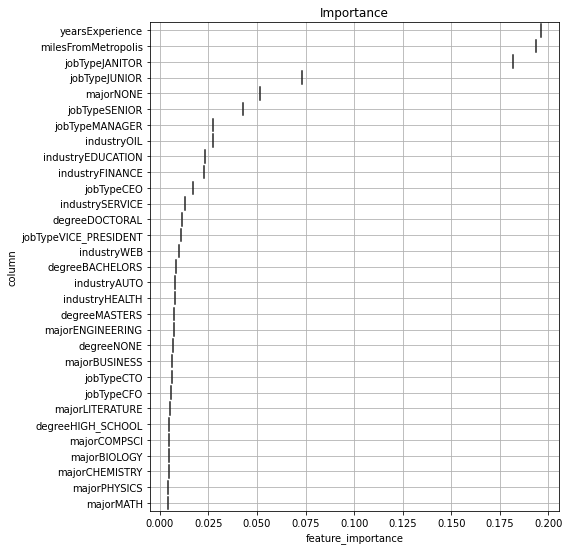

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(rf)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances,iloc, train_X.iloc[1:50000]) 


### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()

# fit in  the model
knnr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model
print_score(knnr)


RMSE-Train: 30.74788750413732
RMSE-Test: 30.656426736094872
Score-Train: 0.36326617132469763
Score-Test: 0.3636725062255821
MedAE-Train: 20.599999999999994
MedAE-Test: 20.599999999999994
MeanAE-Train: 24.490310235853425
MeanAE-Test: 24.42483985765125 

CPU times: user 12.3 s, sys: 1.47 s, total: 13.8 s
Wall time: 13.4 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 21.33992793029516
RMSE-Test: 21.29749312313329
Score-Train: 0.6933003688415091
Score-Test: 0.6928895488777872
MedAE-Train: 14.358874865009739
MedAE-Test: 14.322831907785208
MeanAE-Train: 16.97688324973983
MeanAE-Test: 16.939973884281553 

CPU times: user 8.02 s, sys: 77 ms, total: 8.1 s
Wall time: 8.15 s


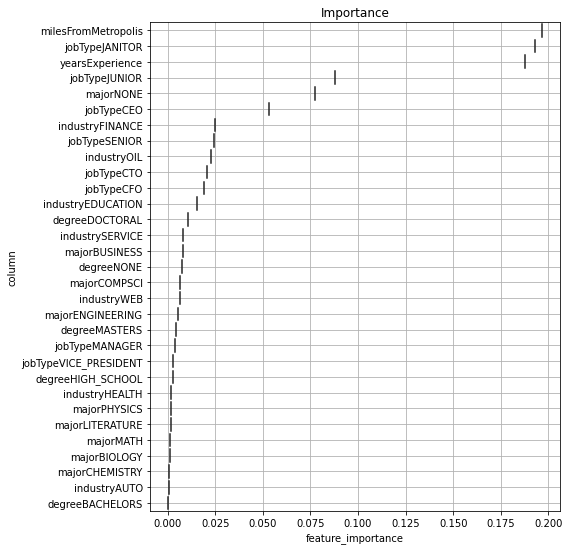

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances,iloc, train_X.iloc[1:50000]) 


### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(DTR)

RMSE-Train: 21.33992793029516
RMSE-Test: 21.29749312313329
Score-Train: 0.6933003688415091
Score-Test: 0.6928895488777872
MedAE-Train: 14.358874865009739
MedAE-Test: 14.322831907785208
MeanAE-Train: 16.97688324973983
MeanAE-Test: 16.939973884281553 

CPU times: user 7.38 s, sys: 51.6 ms, total: 7.43 s
Wall time: 7.39 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.79203318027922
RMSE-Test: 25.667533498456006
Score-Train: 0.5519788519571365
Score-Test: 0.5539270404786423
MedAE-Train: 19.170212765957444
MedAE-Test: 19.034682080924853
MeanAE-Train: 21.20274339756536
MeanAE-Test: 21.11261557354999 

CPU times: user 23.6 s, sys: 281 ms, total: 23.9 s
Wall time: 23.8 s


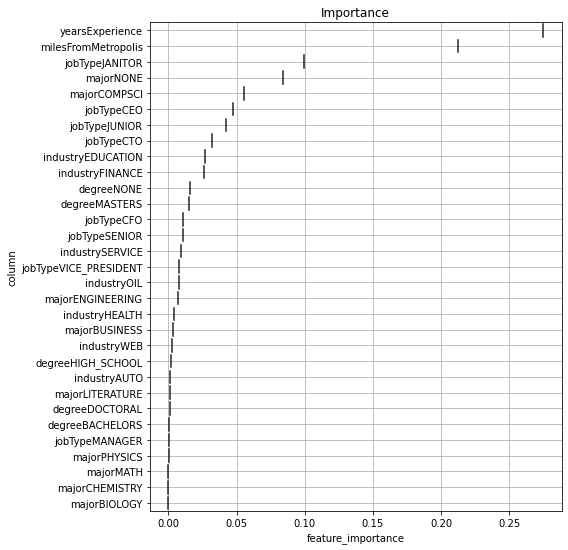

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(AdaBoost)

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost .feature_importances,iloc, train_X.iloc[1:50000]) 


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[16:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 21.192090220191623
RMSE-Test: 21.149373898237425
Score-Train: 0.69753512662084
Score-Test: 0.6971464610898375
MedAE-Train: 14.290199279785156
MedAE-Test: 14.258552551269531
MeanAE-Train: 16.870951732825276
MeanAE-Test: 16.842976801026513 

CPU times: user 11.2 s, sys: 336 ms, total: 11.6 s
Wall time: 12.4 s


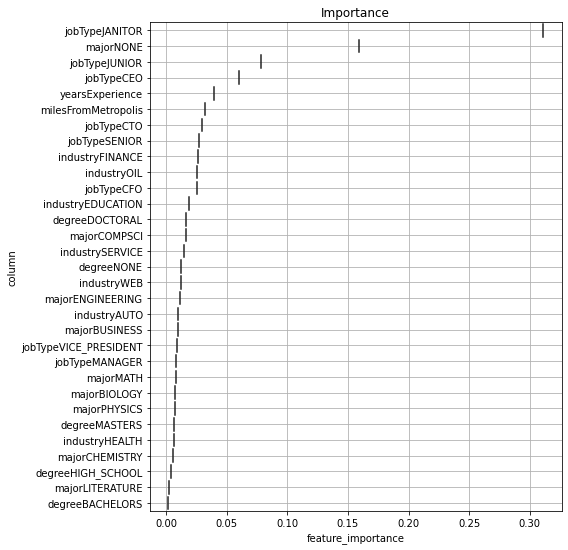

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()
xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances,iloc, train_X.iloc[1:50000]) 


### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 21.636927528676235
RMSE-Test: 21.5787565927971
Score-Train: 0.6847039443121599
Score-Test: 0.6847243316327658
MedAE-Train: 14.524000241620858
MedAE-Test: 14.503879034819619
MeanAE-Train: 17.22304532975916
MeanAE-Test: 17.180218850343383 

CPU times: user 27.1 s, sys: 54.5 ms, total: 27.2 s
Wall time: 27.5 s


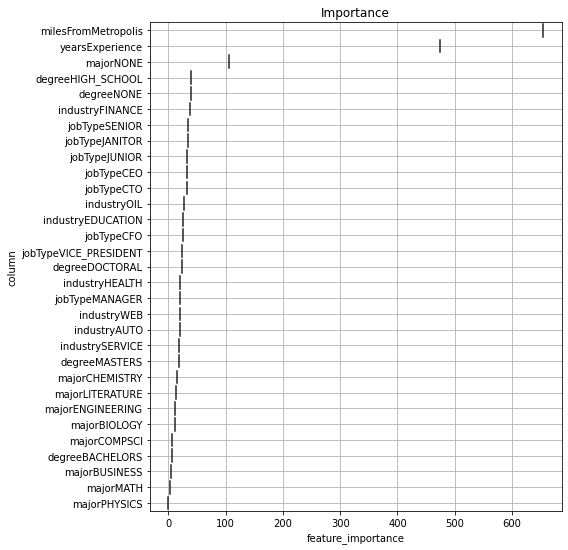

In [ ]:
%%time
# Fit a lightgbm Regressor model to the train dataset
# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg =  lgbm()
lg.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(lg)

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances,iloc, train_X.iloc[1:50000]) 


### Comparing all the model based on metric

In [ ]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])


  Metric         Lr     Dtree     Forest        Knn        GBR    Xboost  \
0   rmse  21.636928  31.81727  20.803215  30.747888  21.339928  21.19209   

    AdaBoost  
0  25.792033  


  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  21.578757  31.800969  20.846985  30.656427  21.297493  21.149374   

    AdaBoost  
0  25.667533  


#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test
print('Results on Test data')
comp_model_test


Results on Test data


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,21.578757,31.800969,20.846985,30.656427,21.297493,21.149374,25.667533
1,MedAE,14.503879,20.000000,14.080000,20.600000,14.322832,14.258553,19.034682
2,MAE,17.180219,24.735477,16.632732,24.424840,16.939974,16.842977,21.112616
3,R-squared,0.581803,0.355736,0.600448,-0.451558,0.555579,0.547923,-0.237994


## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions param_grid, n_iter= 20, cv= 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model 
  random.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])
  print(random.best_params_)

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomforestRegressor(),X_train, Y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingtRegressor(),X_train, Y_train,param_grid=GBR_para_grid )


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 30.0, 'learning_rate': 0.1}


In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train, Y_train,param_grid=DTR_para_grid )


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


In [ ]:
from xgboost import XGBRegressor
# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(XGBRegressor(),X_train, Y_train,param_grid=XGB_para_grid )

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[16:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.588905999138213
RMSE-Test: 30.45271636858634
Score-Train: 0.3698335949286501
Score-Test: 0.37210113543347045
MedAE-Train: 20.678571428571473
MedAE-Test: 20.673684210526446
MeanAE-Train: 24.41174181870673
MeanAE-Test: 24.326047728347977 

CPU times: user 7.87 s, sys: 84.8 ms, total: 7.96 s
Wall time: 8.48 s


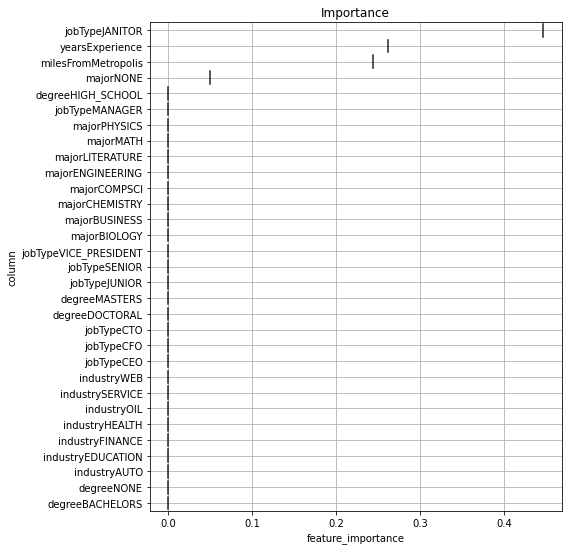

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})

# Fit the model to the data
rf.fit(X_Train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(rf)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:1000])

### Gradient Boosting Regressor

RMSE-Train: 19.10546119767397
RMSE-Test: 19.07245719242596
Score-Train: 0.7541657390927625
Score-Test: 0.7537076513510989
MedAE-Train: 13.476157253823331
MedAE-Test: 13.390922506496949
MeanAE-Train: 15.492341008591854
MeanAE-Test: 15.446469990617711 

CPU times: user 27.8 s, sys: 240 ms, total: 28 s
Wall time: 28.6 s


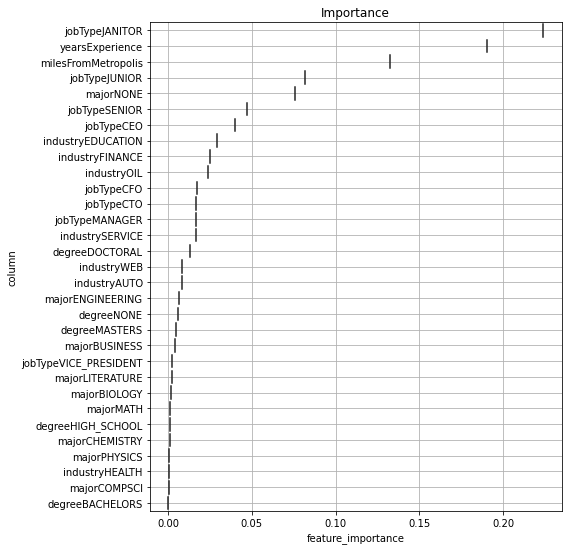

In [ ]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 30.0, 'learning_rate': 0.1})
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances,iloc, train_X.iloc[1:50000]) 


### Decision Tree Regrsessor

In [ ]:
%%time
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0})
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(DTR)


RMSE-Train: 19.10546119767397
RMSE-Test: 19.07245719242596
Score-Train: 0.7541657390927625
Score-Test: 0.7537076513510989
MedAE-Train: 13.476157253823331
MedAE-Test: 13.390922506496949
MeanAE-Train: 15.492341008591854
MeanAE-Test: 15.446469990617711 

CPU times: user 17.3 s, sys: 78.1 ms, total: 17.4 s
Wall time: 17.3 s


### XGBoost Regressor

[17:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.66559575445311
RMSE-Test: 19.619465091779514
Score-Train: 0.7395396786343518
Score-Test: 0.7393774752498352
MedAE-Train: 13.667314529418945
MedAE-Test: 13.605361938476562
MeanAE-Train: 15.843911004707778
MeanAE-Test: 15.80333752445001 

CPU times: user 16.5 s, sys: 62.5 ms, total: 16.6 s
Wall time: 16.5 s


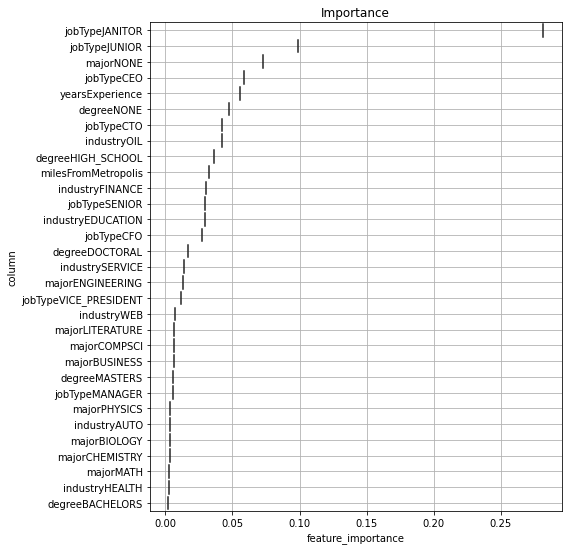

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4} )
xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances,iloc, train_X.iloc[1:50000]) 


## Comparing the metrics for tuned models

In [ ]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)


In [ ]:
print("Metrics on train data")
comp_model_train

Metrics on train data


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,34.700354,30.588906,19.105461,19.665596
1,MedAE,24.251419,20.678571,13.476157,13.667315
2,MAE,27.914745,24.411742,15.492341,15.843911
3,R-squared,-3.549890,-0.684747,0.678523,0.641571


As we can clearly see, GBR(Gradient boosting regressor) model outperfrom the other models for this dataset. Hence, We are finally selecting **GBR algorithm** for our ML Model. 

### Now working with the test dataset provided

In [ ]:
# test data 
test_X = test_data
test_X

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X, col_test)

In [ ]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType', 'Degree', 'major', 'industry'], axis=1)
test_X = encoder.fit_transform(test_X.ddrop(['yearsExperience', 'milesFromMetropolis'], axis=1))

test_X = test_X.join(test_drop['yearExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.916667,0.737374
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.474747
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.708333,0.090909
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.583333,0.969697
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.444444


In [ ]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_X)

array([111.04719023,  89.83858172, 181.30768947, ...,  51.85988751,
       161.58026488, 115.74476236])

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [ ]:
# predicted values in dataframe
predictions

,0
0,111.047190
1,89.838582
2,181.307689
3,105.278259
4,118.837667
...,...
999995,160.005623
999996,112.108457
999997,51.859888
999998,161.580265


**Business Problem:**

In [ ]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample =train_data.sample(100)
sample


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
356297,MANAGER,MASTERS,LITERATURE,OIL,0.875000,0.989899,100
300806,SENIOR,HIGH_SCHOOL,NONE,HEALTH,0.416667,0.101010,112
941221,SENIOR,BACHELORS,ENGINEERING,AUTO,0.666667,0.333333,93
486027,CTO,DOCTORAL,COMPSCI,SERVICE,0.250000,0.949495,148
803541,CEO,HIGH_SCHOOL,NONE,WEB,0.916667,0.868687,102
...,...,...,...,...,...,...,...
232228,MANAGER,NONE,NONE,SERVICE,0.208333,0.464646,58
335442,SENIOR,DOCTORAL,NONE,SERVICE,0.375000,0.777778,83
261507,CTO,MASTERS,BIOLOGY,SERVICE,0.708333,0.787879,117
774300,MANAGER,DOCTORAL,PHYSICS,HEALTH,0.208333,0.141414,91


In [ ]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

#encodind the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

#processing the sample data
train = train_X.join(sample.iloc[:,4:])

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary']< 60]
sample

#Preparing the x and y values
x_sample = sample.drop('salary', axis=1)
y_sample = sample['salary']


# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample, col_test)
sample_x


In [ ]:
#predicting the sample
predicted_out = GBR.predict(sample_x)
predicted_out


array([47.1014868 , 37.83452829, 35.97049851, 49.96976828, 34.91039047,
       56.72153655, 74.3375505 ])

In [ ]:
y_sample  #Real values

48480     43
87394     34
884       36
923277    47
47017     37
267685    44
232228    58
Name: salary, dtype: int64

### As we can see the difference in values.

**Example**: The last sample the real value is 58 but the model predicted it to be 74...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

- ### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:

**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company

## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

## **`SOLUTION`**:

We will fit in these data points into the model and suppose the model provide us the answer as 180

In this case we will basically provide the Manager with a range of salaries i.e

We can offer him a salary range of 175-190 dollars

## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper-parameter tunning of each model and did prediction.